In [1]:
# Platform terms: ["dashboard", "platform", "decision-support"]

project = "platform"

import pandas

from observatory import start_project
start_project(project)

Directory '/Users/enost/Downloads/platform' created
Done!


In [14]:
# Get tweets about platforms in nature conservation (Historical focus)
from observatory import search_twitter
dash_twitter = search_twitter(q = 'conservation (dashboard OR dashboards) has:links', project=project)
platform_twitter = search_twitter(q = 'conservation data (platform OR platforms) has:links', project=project) # Platform is not a very good term here....oil platforms? policy platform? social media platform?
ds_twitter = search_twitter(q = 'conservation ("decision support" OR "decision-support") has:links', project=project)

{'query': 'conservation data (platform OR platforms) has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_results': 100, 'start_time': '2006-03-21T00:00:00.00Z', 'end_time': '2022-01-01T00:00:00.00Z'}
Done!


In [3]:
# Get Google results about platforms in nature conservation (Relevance)
from observatory import search_google
dash_google = search_google(q = 'nature conservation dashboard', project = project)
platform_google = search_google(q = 'nature conservation platform', project = project)
ds_google = search_google(q = 'nature conservation decision-support', project = project)

Done
Done
Done


In [15]:
# Compile results
from observatory import twitter_process 
twitter = twitter_process(project=project)
from observatory import google_process
google = google_process(datatype = "CSV", project=project)

In [16]:
# Extract organizations from Twitter/Google results
from observatory import get_domains
twitter = get_domains(twitter)
google = get_domains(google)
twitter.groupby(by="domain").count().sort_values(by="link", ascending=False).head(20)
google.groupby(by="domain").count().sort_values(by="link", ascending=False).head(20)

,date,link,metrics,source,query
domain,,,,,
wiley,0,9,0,9,9
sciencedirect,0,5,0,5,5
ca,0,5,0,5,5
europa,0,5,0,5,5
mo,0,4,0,4,4
nature,0,4,0,4,4
worldwildlife,0,3,0,3,3
iucn,0,3,0,3,3
usda,0,3,0,3,3


In [ ]:
# Process all data together 
from observatory import search_merge
pages = search_merge(twitter = twitter, google = google, project = project)
pages

In [26]:
# Manage duplication of links here....
## Load previous "all_search_results"
p1 = pandas.read_csv("AI_ML/all_search_results.csv")
p2 = pandas.read_csv("algorithm/all_search_results.csv")
previous = pandas.concat([p1, p2], ignore_index=True)
## De-duplicate from this list of pages where there is a match on previous search
pages = pages[~pages["link"].isin(previous["link"])]
pages

,index,date,link,metrics,source,query,domain
0,0,2011-01-21T19:52:37.000Z,http://wp.me/puF78-5Q,0.0,Twitter,conservation (dashboard OR dashboards) has:links,wp
1,1,2011-06-16T16:32:27.000Z,http://dishnews.blog.fc2.com/blog-entry-72.html,0.0,Twitter,conservation (dashboard OR dashboards) has:links,fc2
2,2,2011-10-13T18:20:44.000Z,http://fb.me/1oA0tEP6w,0.0,Twitter,conservation (dashboard OR dashboards) has:links,fb
3,3,2011-11-11T13:57:10.000Z,http://j.mp/sMfCB3,0.0,Twitter,"conservation (""decision support"" OR ""decision-...",j
4,4,2012-01-10T01:52:53.000Z,http://slidesha.re/SDM_BCT,0.0,Twitter,"conservation (""decision support"" OR ""decision-...",slidesha
...,...,...,...,...,...,...,...
1208,139,NaN,https://dwr.virginia.gov/,NaN,Google,nature conservation dashboard,virginia
1209,140,NaN,https://defenders-cci.org/publication/states-3...,NaN,Google,nature conservation dashboard,defenders-cci
1210,141,NaN,https://www.wcs.org/about-us/careers,NaN,Google,nature conservation dashboard,wcs
1211,142,NaN,https://natureconservation.pensoft.net/login.php,NaN,Google,nature conservation dashboard,pensoft


In [29]:
# Get Twitter archives
#pages = pandas.read_csv("algorithm/all_search_results.csv")
from observatory import get_versions
results = get_versions(pages, project = project)
results

,level_0,index,date,link,metrics,source,query,domain,full_url,url_meta,wm_url,wm_meta
0,0,0,2011-01-21T19:52:37.000Z,http://wp.me/puF78-5Q,0.0,Twitter,conservation (dashboard OR dashboards) has:links,wp,https://crunchenergy.wordpress.com/2011/01/21/...,None,None,No Wayback Version; Got Live URL
1,1,1,2011-06-16T16:32:27.000Z,http://dishnews.blog.fc2.com/blog-entry-72.html,0.0,Twitter,conservation (dashboard OR dashboards) has:links,fc2,https://error.fc2.com/blog/e/404/,None,None,No Time-of-Tweet Versions; Got Older Version
2,2,2,2011-10-13T18:20:44.000Z,http://fb.me/1oA0tEP6w,0.0,Twitter,conservation (dashboard OR dashboards) has:links,fb,https://www.facebook.com/login/,None,http://web.archive.org/web/20220628000850id_/h...,No Time-of-Tweet Versions; Got Older Version
3,3,3,2011-11-11T13:57:10.000Z,http://j.mp/sMfCB3,0.0,Twitter,"conservation (""decision support"" OR ""decision-...",j,https://www.natureserve.org/aboutUs/PressRelea...,None,http://web.archive.org/web/20120316205525id_/h...,No Time-of-Tweet Versions; Got Older Version
4,4,4,2012-01-10T01:52:53.000Z,http://slidesha.re/SDM_BCT,0.0,Twitter,"conservation (""decision support"" OR ""decision-...",slidesha,https://www.slideshare.net/subatomicdoc/sdm-ds...,None,http://web.archive.org/web/20210313133446id_/h...,No Time-of-Tweet Versions; Got Older Version
...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1208,139,NaN,https://dwr.virginia.gov/,NaN,Google,nature conservation dashboard,virginia,https://dwr.virginia.gov/,None,None,Not historical
1171,1209,140,NaN,https://defenders-cci.org/publication/states-3...,NaN,Google,nature conservation dashboard,defenders-cci,https://defenders-cci.org/publication/states-3...,None,None,Not historical
1172,1210,141,NaN,https://www.wcs.org/about-us/careers,NaN,Google,nature conservation dashboard,wcs,https://www.wcs.org/about-us/careers,None,None,Not historical
1173,1211,142,NaN,https://natureconservation.pensoft.net/login.php,NaN,Google,nature conservation dashboard,pensoft,https://natureconservation.pensoft.net/login.php,None,None,Not historical


In [30]:
# Scrape pages
## Initialize / De-duplicate full urls
#results = pandas.read_csv(project+"/page_versions_full.csv")
from observatory import initialize_scrape
urls = initialize_scrape(versions = results, project = project) 

Done!


In [31]:
%cd digcon_scraper/digcon_scraper/
from observatory import scrape
scrape(urls)

/Users/enost/Downloads/digcon_scraper/digcon_scraper


2022-06-28 10:47:36 [py.warnings] WARNING: /Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/extensions/feedexport.py:289: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)



2022-06-28 10:47:44 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.redvector.com/lpe/course/details/04-08-2014--live-interactive-webinar--introduction-to-the-international-energy-conservation-code--tuesday--april-08--2014--12pm-3pm-est/8bc6a826-8a66-468a-8325-bd7a255b2ae1/qwhpg0iqodc-3d/3.00/cart_catalog> (failed 3 times): 500 Internal Server Error


2022-06-28 10:47:46 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/for-business-and-industry/business-case-studies> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-06-28 10:47:46 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/for-business-and-industry/business-case-studies>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/

2022-06-28 10:48:11 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/conl.12385/abstract> (failed 3 times): 503 Service Unavailable
2022-06-28 10:48:11 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/conl.12385/full> (failed 3 times): 503 Service Unavailable


2022-06-28 10:48:18 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.aspb.ab.ca/events/using_soils_treering_data_to_establish_restoration_target_at_the_cross_conservation_area> (failed 3 times): 500 Internal Server Error


2022-06-28 10:48:21 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/1365-2664.12419> (failed 3 times): 503 Service Unavailable


2022-06-28 10:48:21 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/epdf/10.1111/conl.12459> (failed 3 times): 503 Service Unavailable


2022-06-28 10:48:32 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/cobi.13305> (failed 3 times): 503 Service Unavailable


2022-06-28 10:48:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://ec.europa.eu/environment/nature/conservation/species/carnivores/coexistence_platform.htm> (failed 3 times): 503 Service Unavailable


2022-06-28 10:48:55 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/full/10.1002/pan3.10083> (failed 3 times): 503 Service Unavailable


2022-06-28 10:48:58 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://wildlife.onlinelibrary.wiley.com/doi/full/10.1002/wsb.1115> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:03 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://sjobs.brassring.com/tgnewui/search/home/home> (failed 3 times): 500 Internal Server Error


2022-06-28 10:49:16 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/10.1111/2041-210x.13608> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:18 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/doi/abs/10.1111/cobi.13792> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:20 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1002/ecs2.3556> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:23 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1002/aqc.3690> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:32 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://esajournals.onlinelibrary.wiley.com/doi/10.1002/fee.1316> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:36 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1002/ajp.23213> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:36 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://ec.europa.eu/environment/nature/conservation/species/carnivores/regional_platforms.htm> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:36 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://esajournals.onlinelibrary.wiley.com/doi/full/10.1002/eap.1414> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:37 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/abs/10.1111/2041-210x.13918> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:37 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://ipbes.net/> (failed 3 times): 500 Internal Server Error


2022-06-28 10:49:38 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/doi/10.1111/conl.12385> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:38 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/1749-4877.12235> (failed 3 times): 503 Service Unavailable
2022-06-28 10:49:38 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://wildlife.onlinelibrary.wiley.com/doi/full/10.1002/wsb.1064> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:38 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://esajournals.onlinelibrary.wiley.com/doi/full/10.1002/fee.2356> (failed 3 times): 503 Service Unavailable
2022-06-28 10:49:38 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/abs/10.1111/2041-210x.12899> (failed 3 times): 503 Service Unavailable


2022-06-28 10:49:41 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cambridge.org/core/books/decisionmaking-in-conservation-and-natural-resource-management/introduction/0d1640c7fa98bead0942602cf86195a6> (failed 3 times): 500 Internal Server Error


2022-06-28 10:49:42 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/journal/25784854> (failed 3 times): 503 Service Unavailable


2022-06-28 10:51:16 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://data.cnra.ca.gov/> (failed 3 times): 502 Bad Gateway


In [33]:
%cd ..

/Users/enost/Downloads


In [34]:
# Quality control
from observatory import query
## Create a copy of the text table
query("copy") # Only need to do this once!
## Remove from db where there was no text scraped
query("filter_empty")
## Remove anything without at least 1 keyword?
queryterms = ["artificial intelligence", "machine learning", "nature ", "conservation ", "algorithm"] # spaces to avoid certain spam...
query("filter_words", terms = queryterms) ## TBD: Need to remove French-language sites?

Done!
Done!
Done!


In [37]:
## Get word counts
from observatory import query
tech_terms = ["artificial intelligence", " ai ", "machine learning", "dashboard", "platform"] # Spaces in ai to capture its use as in AI rather than e.g. said
cons_terms = ["conservation", "nature"]
#grammar = ["is", "will"] # for phrases
topics = ["forest", "mountain", "wetland", "boreal", "ocean", "river", "arctic"]
ethics = ["privacy", "surveillance", "cost"]
tools = ["market", "decision making", "working land", "indigenous-led", "easement", "decision support", "decision-support"]
combined_terms = tech_terms + cons_terms + topics + ethics + tools

words = query("get_words", combined_terms)
words

,url,domain,source,date,artificial intelligence,ai,machine learning,dashboard,platform,conservation,...,privacy,surveillance,cost,market,decision making,working land,indigenous-led,easement,decision support,decision-support
0,http://web.archive.org/web/20140731104236id_/h...,chesterfieldpost,Twitter,2011-36,0,0,0,0,0,4,...,1,0,3,1,0,0,0,0,0,0
1,https://etienne34-blog.tumblr.com/post/1664008...,tumblr,Twitter,2012-04,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,http://web.archive.org/web/20210510214124id_/h...,facilityexecutive,Twitter,2019-10,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,https://www.freelancer.com/projects/machine-le...,freelancer,Twitter,2012-16,0,0,2,0,0,6,...,0,0,0,0,0,0,0,0,0,0
4,http://web.archive.org/web/20210410214115id_/h...,goathunter,Twitter,2012-08,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25277,https://pubmed.ncbi.nlm.nih.gov/27605354/,nih,Google,None,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
25278,https://www.worldwildlife.org/about,worldwildlife,Google,None,0,0,0,0,0,4,...,0,0,0,1,0,0,0,0,0,0
25279,https://tpwd.texas.gov/landwater/water/conserv...,texas,Google,None,0,0,0,6,0,1,...,1,0,0,0,0,0,0,0,0,0
25280,https://mdc.mo.gov/,mo,Google,None,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0


2022-06-28 10:57:45 [py.warnings] WARNING: /Users/enost/Downloads/observatory_dev_v02.py:1147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['date'].update(pandas.to_datetime(counts["date"], format="%Y").dt.to_period("Y")) # Convert specific year/weeks to years #counts['date'].dt.to_timestamp('Y').dt.strftime("%Y-%m-%dT%H:%M:%S.%fZ") #

2022-06-28 10:57:45 [py.warnings] WARNING: /Users/enost/Downloads/observatory_dev_v02.py:1148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total = counts.groupby(by='date').agg({"url": "nunique"}) # Count the total number of pages we're examining. This should be the same for ev

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

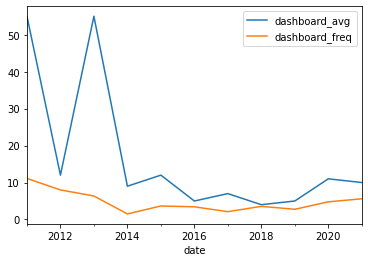

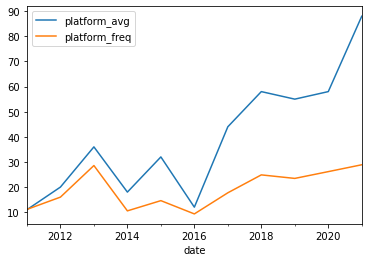

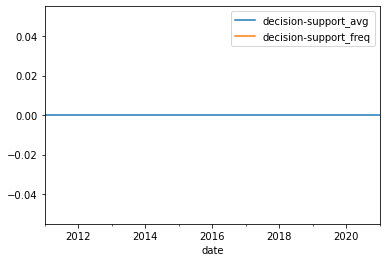

In [38]:
# Analyze
## How has the conversation about AI/ML changed over time? (Twitter frequency/average)
from observatory import analyze_twitter
avg, freq, total = analyze_twitter(words, terms = ["dashboard", "platform", "decision-support"])
## Where the term conservation is used
#, freq, total = analyze_twitter(words.loc[words['nature']>0], ["artificial intelligence", "machine learning"])

In [39]:
## Are certain organizations (and organization sizes) more likely to mention AI/ML? (Crawl)
from observatory import analyze_orgs
avg, freq = analyze_orgs(words, orgs = ["raresites", "davidsuzuki", "grandriver", "wwf", "ecotrust", "natureconservancy"], terms = ["artificial intelligence", "forest", "machine learning"])
## Are certain organizations more likely to mention ethics terms in conjunction with AI/ML? (Crawl)
avg, freq = analyze_orgs(words.loc[(words["dashboard"]>0) | (words["platform"]>0) | (words["decision-support"]>0) | (words["decision support"]>0)], orgs = ["raresites", "davidsuzuki", "grandriver", "wwf", "ecotrust", "natureconservancy"], terms = ["privacy", "surveillance"])
avg

,privacy_avg,surveillance_avg
raresites,0.0,0.0
davidsuzuki,20.0,0.0
grandriver,0.0,0.0
wwf,1.42,0.0
ecotrust,0.0,0.0
natureconservancy,0.0,0.0


dashboard decision support
Zeros: 25046, 99%
decision support but not dashboard: 82, 0%
dashboard but not decision support: 147, 0%
Together: 7, 0%




,dashboard,decision support
dashboard,1.000000,0.930261
decision support,0.930261,1.000000


<AxesSubplot:xlabel='dashboard', ylabel='decision support'>

decision support dashboard
Zeros: 25046, 99%
dashboard but not decision support: 147, 0%
decision support but not dashboard: 82, 0%
Together: 7, 0%




,decision support,dashboard
decision support,1.000000,0.930261
dashboard,0.930261,1.000000


<AxesSubplot:xlabel='decision support', ylabel='dashboard'>

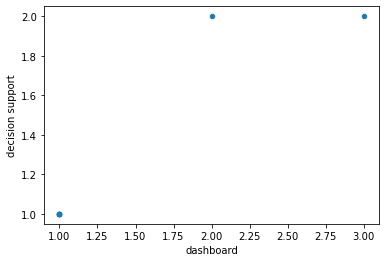

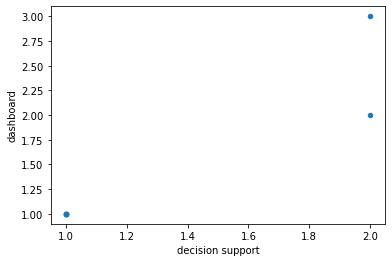

In [40]:
## Are certain topics associated with other (e.g. forest and AI vs mountain and AI?) (Twitter, Google, and Crawl)
from observatory import analyze_term_correlations
#analyze_term_correlations(words, ["artificial intelligence", "river", " ai "])
analyze_term_correlations(words, ["dashboard", "decision support"])